In [1]:
import tensorflow as tf 
import numpy as np 
import matplotlib.pyplot as plt

# checking the version of tensorflow
print(tf.__version__) 


# In TensorFlow 2.0 this is the way
# to activate eager execution mode
# and ONLY this way. 
tf.executing_eagerly()


2.0.0


True

In [2]:
# get minst data
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train / 255.0
x_test =  x_test / 255.0


# add channel 
# Add a channels dimension
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

print("training set shape {}".format(x_train.shape))
print("test set shape {}".format(x_test.shape))


    
# shuffle and batch the training set
batch_size = 32 
num_images = 50000

train_ds = tf.data.Dataset.from_tensor_slices(
    (x_train, y_train)).shuffle(num_images).batch(batch_size)


# batch the test set 
test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(batch_size)


training set shape (60000, 28, 28, 1)
test set shape (10000, 28, 28, 1)


In [4]:
from tensorflow.keras.layers import Dense, Flatten, Conv2D, InputLayer, GlobalAveragePooling2D
from tensorflow.keras import Model
from tensorflow.keras import backend as k 



a = tf.keras.backend.placeholder(dtype=tf.float32, shape=(None, 28,28,1))

model = tf.keras.models.Sequential(

    [   InputLayer( input_shape=( 28,28,1), name="input"),
        Conv2D(32, 3, activation='relu',padding='valid',name="conv1" ),
        Conv2D(32, 3, activation='relu',padding='same',name="conv2" ),
        GlobalAveragePooling2D(),
        Dense(10, input_shape=(128,1), name="fc2", activation="softmax"),
    ]
)


model.compile(loss= "sparse_categorical_crossentropy", 
                  optimizer="adam" , 
                  metrics=['accuracy'])

preds = model.fit(x_train, y_train, batch_size=32, epochs=5)



Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 12s 203us/sample - loss: 1.6717 - accuracy: 0.3850- loss: 1.7072 - accu -
Epoch 2/5
60000/60000 [==============================] - 10s 170us/sample - loss: 1.2770 - accuracy: 0.5748
Epoch 3/5
60000/60000 [==============================] - 11s 183us/sample - loss: 0.9983 - accuracy: 0.6953
Epoch 4/5
60000/60000 [==============================] - 11s 186us/sample - loss: 0.7902 - accuracy: 0.7628- loss:
Epoch 5/5
60000/60000 [==============================] - 11s 183us/sample - loss: 0.6520 - accuracy: 0.8019


In [5]:

single_example = x_train[0].reshape(1,28,28,1)



## Class activation maps 

In [93]:
img_indx = 87
single_example = x_test[img_indx].reshape(1,28,28,1)
label = int(y_train[img_indx])
last_layer_weights = model.weights[-2]
get_conv_layer = Model(inputs=model.input, outputs=model.get_layer("conv2").output)
layer_feature_maps = get_conv_layer.predict(single_example)
weights = last_layer_weights[:,label]

cam = 0 
for k in range(layer_feature_maps.shape[-1]): 
     cam += weights[k]*layer_feature_maps[:,:,:,k]

        
cam = tf.reshape(cam,[26,26,1])
cam_resized= tf.image.resize(cam,[28,28])
    

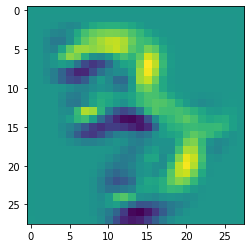

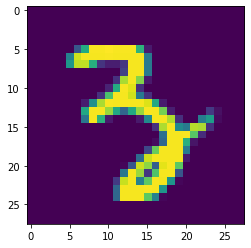

In [94]:
cam_numpy = cam_resized.numpy()
new_cam = cam_numpy.reshape(28,28)
import matplotlib.pyplot as plt
plt.imshow(new_cam)
plt.figure()
plt.imshow(single_example.reshape(28,28))

TensorShape([26, 1])

In [81]:
label

4